# Problem Set 1, due January 13th at 12:00pm 
(in other words, it is due at noon, or one minute after 11:59am).

###Before You Start
Make sure to at least take a basic tutorial in the IPython notebook, otherwise you'll be totally lost.  For this problem set, you should download INFX574-PS1.ipynb and the flights.zip dataset from Canvas. Create a local copy of the notebook and rename it LASTNAME_FIRSTNAME-PS1.ipynb. Then edit your renamed file directly in your browser by typing:
```
ipython notebook <name_of_downloaded_file>
```

You should also make sure the following libraries load correctly (click on the box below and hit Ctrl-Enter)

In [ ]:
#IPython is what you are using now to run the notebook
import IPython
print "IPython version:      %6.6s (need at least 1.0)" % IPython.__version__

# Numpy is a library for working with Arrays
import numpy as np
print "Numpy version:        %6.6s (need at least 1.7.1)" % np.__version__

# SciPy implements many different numerical algorithms
import scipy as sp
print "SciPy version:        %6.6s (need at least 0.12.0)" % sp.__version__

# Pandas makes working with data tables easier
import pandas as pd
print "Pandas version:       %6.6s (need at least 0.11.0)" % pd.__version__

# Module for plotting
import matplotlib
print "Mapltolib version:    %6.6s (need at least 1.2.1)" % matplotlib.__version__

# SciKit Learn implements several Machine Learning algorithms
import sklearn
print "Scikit-Learn version: %6.6s (need at least 0.13.1)" % sklearn.__version__

##About the Problem Set: 
This is the same problem set used by Emma Spiro in INFX573. The only difference is that instead of doing the problem set in R, you will use Python and the IPython notebook.

##Instructions: 
In this problem set you will perform a basic exploratory analysis on an example dataset, bringing to bear all of your new skills in data manipulation and visualization. You will be required to submit well commented python code, documenting all code used in this problem set, along with a write up answering all questions below. Use figures as appropriate to support your answers, and when required by the problem. 
This data set uses the NYCFlights13 dataset. You can download the dataset from canvas.

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
flights_df=pd.read_csv("C:/Users/iGuest/Desktop/flights.csv")
flights_df=flights_df.fillna(np.nan)

In [ ]:
flights_df

In [ ]:
flights_df.describe()
pd.isnull(flights_df)
flights_df.dropna()

In [ ]:
print flights_df.shape
print flights_df.columns
print flights_df.dtypes

In [16]:
flights_df.dest.unique()
flights_df.head(10)

,Unnamed: 0,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,1,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400,5.0,17.0
1,2,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416,5.0,33.0
2,3,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089,5.0,42.0
3,4,2013,1,1,544.0,-1.0,1004.0,-18.0,B6,N804JB,725,JFK,BQN,183.0,1576,5.0,44.0
4,5,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762,5.0,54.0
5,6,2013,1,1,554.0,-4.0,740.0,12.0,UA,N39463,1696,EWR,ORD,150.0,719,5.0,54.0
6,7,2013,1,1,555.0,-5.0,913.0,19.0,B6,N516JB,507,EWR,FLL,158.0,1065,5.0,55.0
7,8,2013,1,1,557.0,-3.0,709.0,-14.0,EV,N829AS,5708,LGA,IAD,53.0,229,5.0,57.0
8,9,2013,1,1,557.0,-3.0,838.0,-8.0,B6,N593JB,79,JFK,MCO,140.0,944,5.0,57.0
9,10,2013,1,1,558.0,-2.0,753.0,8.0,AA,N3ALAA,301,LGA,ORD,138.0,733,5.0,58.0


##Some Tips

* This assignment involves extensive Data frame splitting and aggregation. You should look into the details of the methods groupby, transform, sum, count, mean etc
* Many of the tasks in the assignment can be done either through the Pandas Data Frame or by converting the data frames to Series. Many of the methods in the numpy are applicable to Series only. When stuck, try to explore the type of object (Pandas Data Frame or Numpy Series) you are dealing with.

##Question 1
Let’s explore flights from NYC to Seattle. Use the flights dataset to answer the following questions.

(a) How many flights were there from NYC airports to Seattle in 2013?

In [37]:
#filtering for flights with destination as Seattle
flights_to_SEA = flights_df[flights_df['dest']=="SEA"]
flights_to_SEA.head(5)

#counting the total number of flights arriving at Seattle
count_SEA_flights = flights_to_SEA['flight'].count()

print(count_SEA_flights)

3923


Ans:The below code shows 3923 flights flying from NYC airports to Seattle in 2013

(b) How many airlines fly from NYC to Seattle?

In [39]:
#counting number of airline(carriers) with dest as Seattle
airlines_to_SEA = flights_to_SEA['carrier'].nunique()

airlines_to_SEA

5

Ans:So, there were 5 airlines flying form NYC to Seattle

(c) How many unique air planes fly from NYC to Seattle?

In [40]:
#counting the number of unique values in 'tailnum'(air planes) column for airplanes flying from NYC to Seattle
planes_to_SEA = flights_to_SEA['tailnum'].nunique()
planes_to_SEA

935

Ans: We see 935 unique air planes flying from NYC to SEA 

(d) What is the average arrival delay for flights from NC to Seattle?

In [41]:
#finding average arrival delay for flights to Seattle
avg_delay_SEA = flights_to_SEA['arr_delay'].mean()
print(avg_delay_SEA)

-1.0990990990990992


Ans: We see that the average delay of flights from NYC to Seattle is -1.099 seconds.

(e) What proportion of flights to Seattle come from each NYC airport?

In [45]:
#Counting total flights by grouping on orgion of flights
flights_airport_prop = pd.DataFrame(flights_to_SEA.groupby('origin', as_index=False)['flight'].count())

#creating a new column to the above table to calculate percentage of Seattle flights from particular airport
flights_airport_prop['percent']=flights_airport_prop['flight']/count_SEA_flights*100

#printing the output
flights_airport_prop

,origin,flight,percent
0,EWR,1831,46.673464
1,JFK,2092,53.326536


Ans: Among the flights flying to Seattle from NYC, 46.67% came from the EWR airport and 53.3% came from JFK and 0.03

## Question 2
Flights are often delayed. Consider the following questions exploring delay patterns.

(a) Which date has the largest average departure delay? Which date has the largest average arrival delay?

In [66]:
#First creating dataframe by combining year,month,day 
flights_df['date'] = flights_df['year'].astype(str) + "-" + flights_df['month'].astype(str) + "-" + flights_df['day'].astype(str)
flights_df.head()

# Code 1
#Calculating average departure delay
dep_delay = pd.DataFrame(flights_df.groupby('date')['dep_delay'].mean())
dep_delay
#finding max average departure delay 
max_dep_delay = dep_delay.ix[dep_delay['dep_delay'].idxmax()]
max_dep_delay

#Finding average arrival delay by grouping it by date
arr_delay = pd.DataFrame(flights_df.groupby('date')['arr_delay'].mean())
arr_delay

#Finding max arrival delay 
max_arr_delay = arr_delay.ix[arr_delay['arr_delay'].idxmax()]
max_arr_delay


#Code 2: 
#Sorting departure delays in descending order and then getting the top row with highest value
dep_delay_2 = pd.DataFrame(dep_delay.sort_values(['dep_delay'],ascending=False))
max_dep_delay_2 = dep_delay_2.head(1)

#Sorting arrival delays in descending order and then getting the top row with highest value
arr_delay_2 = pd.DataFrame(arr_delay.sort_values(['arr_delay'],ascending=False))
max_darr_delay_2 = arr_delay_2.head(1)

#Printing the above variable outputs to validate code 1 results
print(max_dep_delay==max_dep_delay_2)
print(max_arr_delay==max_darr_delay_2)



         dep_delay
date              
2013-3-8      True
         arr_delay
date              
2013-3-8      True


Ans: Both, the maximum departure delay and and the Maximum arrival delay was on 2013-3-8.

(b) What was the worst day to fly out of NYC in 2013 if you dislike delayed flights?


In [71]:
#getting the day with maximum number of delayed depature flights
flights_df_1 = flights_df[flights_df['dep_delay']>0]
total_daily_delay = pd.DataFrame(flights_df_1.groupby('date')['dep_delay'].count())

#Code 1: 
#Using index to find date with maximum count of departure delays
count_max_dep_delay = total_daily_delay.ix[total_daily_delay['dep_delay'].idxmax()]
print(count_max_dep_delay)

#Code 2: 
#Getting the max date using a similar descending sort logic as before
desc_dep_delay_daily = pd.DataFrame(total_daily_delay.sort_values(['dep_delay'],ascending=False))
max_dep_delay_date = desc_delay_daily.head(1)

print(count_max_dep_delay==max_dep_delay_date)



dep_delay    674
Name: 2013-12-23, dtype: int64
           dep_delay
date                
2013-12-23      True


Ans: The maximum number of flights were delayed on 2013-12-23 which can be considered as a bad day for flying. 

(c) Are there any seasonal patterns in departure delays for flights from NYC?

In [75]:
#Code 1
# Counting delayed departure flights for each month
dep_delay_monthly = pd.DataFrame(flights_df_1.groupby('month')['dep_delay'].count())

#looking for seasonal pattern after doing a descending sort order again
dep_delay_monthly = pd.DataFrame(dep_delay_monthly.sort_values(['dep_delay'], ascending=False))
dep_delay_monthly


,dep_delay
month,
7,13773
12,13490
6,12558
8,11665
5,11227
3,11166
4,10484
1,9620
2,9088


Ans: Max delay occurs in July followed by December and the least delay occurs in September.

(d) On average, how do departure delays vary over the course of a day?

In [74]:
#Removing missing values from the dataframe
flights_df_1 = flights_df_1.dropna()

#Code 1: finding the number of delayed flights each hour
hourly_delay_pattern = pd.DataFrame(flights_df_1.groupby('hour')['dep_delay'].count())
hourly_delay_pattern



,dep_delay
hour,
0.0,876
1.0,221
2.0,63
3.0,11
5.0,366
6.0,4114
7.0,4439
8.0,6173
9.0,5486


Ans: The departure delays increase starting morning and then increases further during the afternoon and drops back again in the late evening.

## Question 3
    Which flight departing NYC in 2013 flew the fastest?

In [50]:
#Calculating speed(dis/time) of the flights
flights_df['speed']=flights_df['distance']/flights_df['air_time']
#sorting speed values
flights_df = flights_df.sort_values(by='speed', ascending=[False])
#printing the output 
flights_df.head()

,Unnamed: 0,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute,speed
216447,216448,2013,5,25,1709.0,9.0,1923.0,-14.0,DL,N666DN,1499,LGA,ATL,65.0,762,17.0,9.0,11.723077
251999,252000,2013,7,2,1558.0,45.0,1745.0,26.0,EV,N17196,4667,EWR,MSP,93.0,1008,15.0,58.0,10.838710
205388,205389,2013,5,13,2040.0,15.0,2225.0,-1.0,EV,N14568,4292,EWR,GSP,55.0,594,20.0,40.0,10.800000
157516,157517,2013,3,23,1914.0,4.0,2045.0,2.0,EV,N12567,3805,EWR,BNA,70.0,748,19.0,14.0,10.685714
10223,10224,2013,1,12,1559.0,-1.0,1849.0,-28.0,DL,N956DL,1902,LGA,PBI,105.0,1035,15.0,59.0,9.857143


Ans: Flight 1499 of Delta Airways (Carrier=DL) flew the fastest.

## Question 4
Which flights (i.e. carrier + flight + dest) happen every day? Where do they fly to?

In [92]:
#creating an additional column combining carrier+flight+dest the dataframe flights_df
flights_df['carrier_flight_dest']=flights_df['carrier'].astype(str)+"+"+flights_df['flight'].astype(str)+"+"+flights_df['dest'].astype(str)
flights_df.head(10)

#counting number of days for which a particular flight operates
daily_flights = pd.DataFrame(flights_df.groupby('carrier_flight_dest',as_index=False)['day'].count())
#selecting flights flying during all days of the year.
daily_flights[daily_flights['day']==365]


,carrier_flight_dest,day
790,AA+119+LAX,365
801,AA+1357+SJU,365
813,AA+1611+MIA,365
842,AA+181+LAX,365
941,AA+59+SFO,365
1130,B6+1783+MCO,365
1178,B6+219+CLT,365
1241,B6+359+BUR,365
1246,B6+371+FLL,365
1272,B6+431+SRQ,365


TAns: The above table above lists all flights that flys on every day of the year.

## Question 5
Develop one research question you can address using the nycflights2013 dataset. Provide two visualizations to support your exploration of this question. Discuss what you find.


   carrier  arr_delay
0       9E       6637
1       AA      10706
2       AS        189
3       B6      23609
4       DL      16413
5       EV      24484
6       F9        392
7       FL       1895
8       HA         97
9       MQ      11693
10      OO         10
11      UA      22222
12      US       7349
13      VX       1746
14      WN       5304
15      YV        258


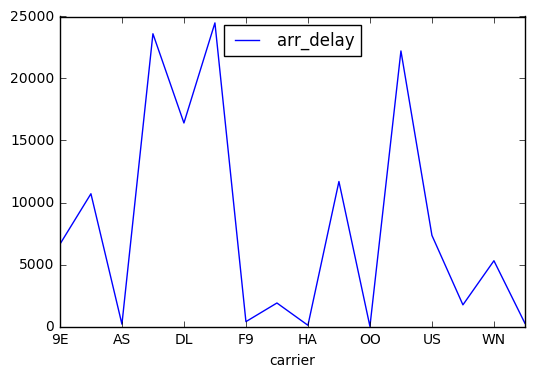

In [100]:
#finding the delayed arrival flights at NYC 
delayed_flights = flights_df[flights_df['arr_delay']>0]
#counting the total delayed arrival flights by carrier
delay_freq= delayed_flights.groupby('carrier', as_index=False)['arr_delay'].count()

print(delay_freq)
delay_freq = delay_freq.set_index('carrier')
delay_freq.plot()
plt.show()

   carrier  dep_delay
0       9E       7063
1       AA      10162
2       AS        226
3       B6      21445
4       DL      15241
5       EV      23139
6       F9        341
7       FL       1654
8       HA         69
9       MQ       8031
10      OO          9
11      UA      27261
12      US       4775
13      VX       2225
14      WN       6558
15      YV        233


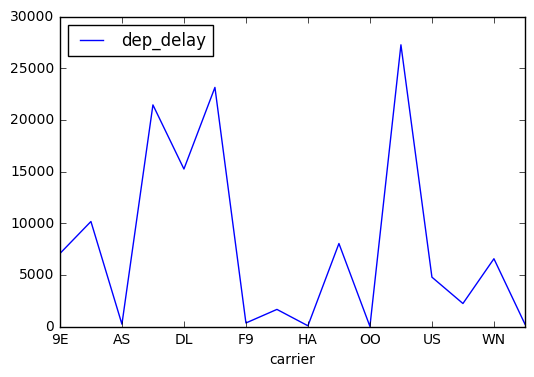

In [101]:
#finding the delayed arrival flights at NYC 
delayed_dep_flights = flights_df[flights_df['dep_delay']>0]
#counting the total delayed arrival flights by carrier
dep_delay_freq= delayed_dep_flights.groupby('carrier', as_index=False)['dep_delay'].count()

print(dep_delay_freq)
dep_delay_freq = dep_delay_freq.set_index('carrier')
dep_delay_freq.plot()
plt.show()

Ans: 
We see from the second plot, that EV has the second highest number of delayed arrival flights as is supported by the visualizations. So, from the two plots combined we can make a conclusion that EV airline has a bad overall quality of service around taking off and landing of flights. So, this would be a helpful insight for the airport authority to improve service offered by the EV airlines.

## Question 6
What weather conditions are associated with flight delays leaving NYC? Use graphics to explore.

In [77]:
#Importing weather data first
weather_df=pd.read_csv("C:/Users/iGuest/Desktop/weather.csv")
#merging above two data frames using variables year,month and day
merged = pd.merge(flights_df,weather_df, on=['year','month','day'],how='inner')

#slecting relevant columns from the merged dataset
merged = merged[['month','day','dep_delay','temp','humid','wind_dir']]
#discarding all NAs(missing values) from the merged dataset
merged.dropna(subset = ['dep_delay','temp','humid','wind_dir'])

#calculating average monthly temperature
avg_temp = pd.DataFrame(merged.groupby('month')['temp'].mean())
#calculating average monthly departure delay
avg_dep_delay = pd.DataFrame(merged.groupby('month')['dep_delay'].mean())

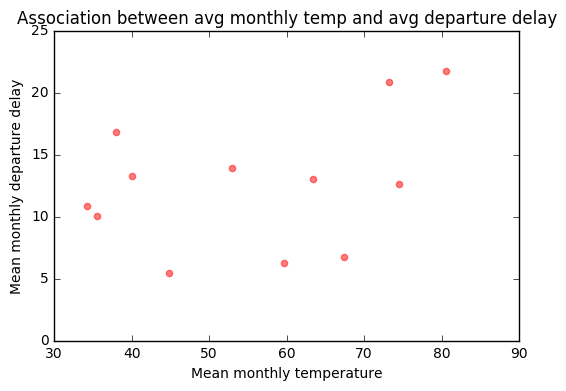

In [81]:
#assigning X as the mean monthly temperature
X = avg_temp['temp']
#assigning Y as the mean monthly departure delay
Y = avg_dep_delay['dep_delay']

#plotting a scatterplot of the values
plt.scatter(X,Y,alpha=0.5, color='red')
plt.xlabel('Mean monthly temperature')
plt.ylabel('Mean monthly departure delay')
plt.title('Association between avg monthly temp and avg departure delay')
plt.show()

Ans: Interpretation:
The above scatterplot shows that with increase in average monthly temperature, the aveguare monthly depature of flights increase in an overall fashion, so summer months might account for more delays. While we see that, this could be unexpected as weather conditions like snow or rains during winter would have been more influential in delayed flights status. However, this observation is based off of only one year's (2013) worth of data.